<a href="https://colab.research.google.com/github/ptoledoc7/Prueba/blob/main/CreditScore(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Score: K-NN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load Data

In [2]:
df = pd.read_csv('credit_score.csv')
df

,Age,Gender,Income,Education,MaritalStatus,NumberChildren,HomeOwnership,CreditScore
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


## Analysis

In [3]:
df.dtypes

Age                int64
Gender            object
Income             int64
Education         object
MaritalStatus     object
NumberChildren     int64
HomeOwnership     object
CreditScore       object
dtype: object

In [4]:
df.isnull().sum()

Age               0
Gender            0
Income            0
Education         0
MaritalStatus     0
NumberChildren    0
HomeOwnership     0
CreditScore       0
dtype: int64

In [5]:
df.nunique()

Age               29
Gender             2
Income            52
Education          5
MaritalStatus      2
NumberChildren     4
HomeOwnership      2
CreditScore        3
dtype: int64

In [6]:
df.describe()

,Age,Income,NumberChildren
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [7]:
def review_measures(data, num_var):
    print(f'Mean: {data[num_var].mean():.2f}')
    print(f'Median: {data[num_var].median():.2f}')
    print(f'Mode: {data[num_var].mode()[0]:.2f}\n')

    print(f'Deviation: {data[num_var].std():.2f}')
    print(f'Minimum: {data[num_var].min():.2f}')
    print(f'Maximum: {data[num_var].max():.2f}')
    print(f'Range: {data[num_var].max() - data[num_var].min():.2f}')

In [8]:
def plot_categorical(data, cat_var, num_var):
    plt.figure(figsize=(10,5))

    sns.barplot(data=data, x=cat_var, y=num_var)

    plt.xlabel(cat_var)
    plt.ylabel(num_var)
    plt.show()

In [9]:
def plot_hist_box(data, num_var):
    plt.figure(figsize=(10,7))

    plt.subplot(2,1,1)
    plt.title('Histograma')
    sns.histplot(data=data, x=num_var)
    plt.gca().set_xlabel('')
    plt.gca().set_ylabel('')

    plt.subplot(2,1,2)
    plt.title('Boxplot')
    sns.boxplot(data=data, x=num_var)
    plt.gca().set_xlabel('')

    plt.show()

### Age

In [10]:
review_measures(df, 'Age')

Mean: 37.98
Median: 37.00
Mode: 25.00

Deviation: 8.48
Minimum: 25.00
Maximum: 53.00
Range: 28.00


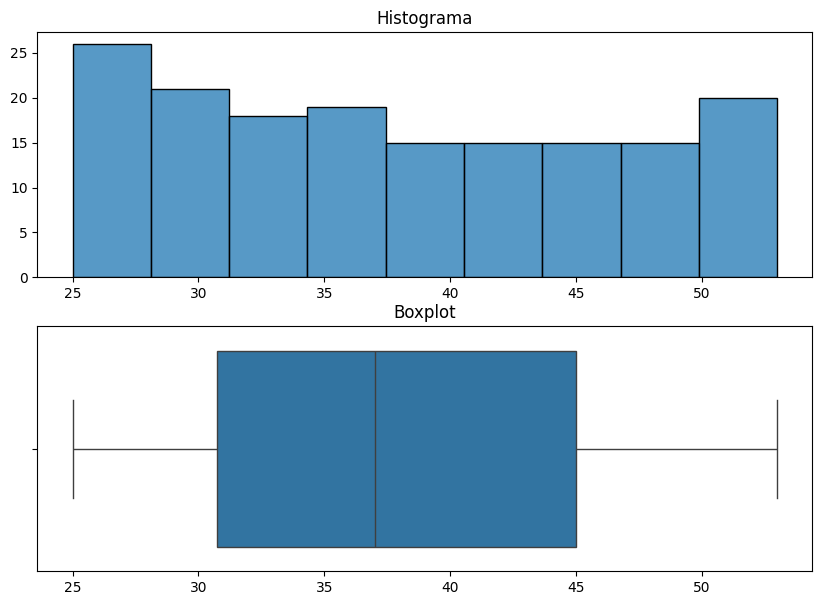

In [11]:
plot_hist_box(df, 'Age')

### Gender

In [12]:
df_gender = df['Gender'].value_counts().sort_index().reset_index(name='Absolute')
df_gender['Relative'] = df_gender['Absolute'] / df_gender['Absolute'].sum() * 100
df_gender

,Gender,Absolute,Relative
0,Female,86,52.439024
1,Male,78,47.560976


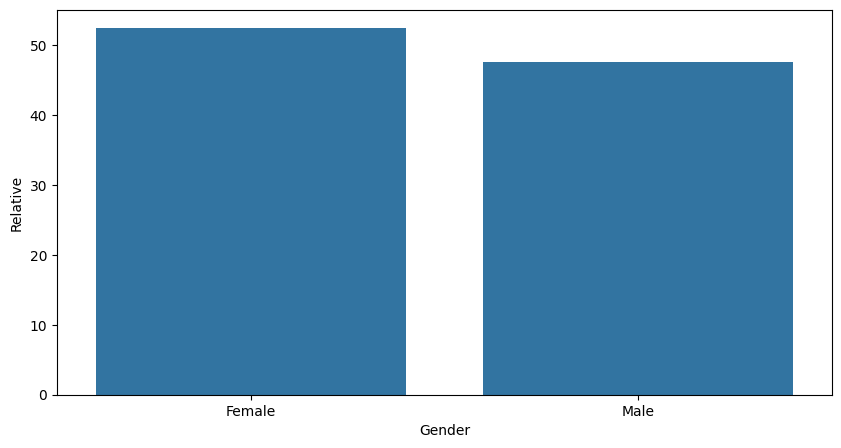

In [13]:
plot_categorical(df_gender, 'Gender', 'Relative')

### Income

In [14]:
review_measures(df, 'Income')

Mean: 83765.24
Median: 83750.00
Mode: 85000.00

Deviation: 32457.31
Minimum: 25000.00
Maximum: 162500.00
Range: 137500.00


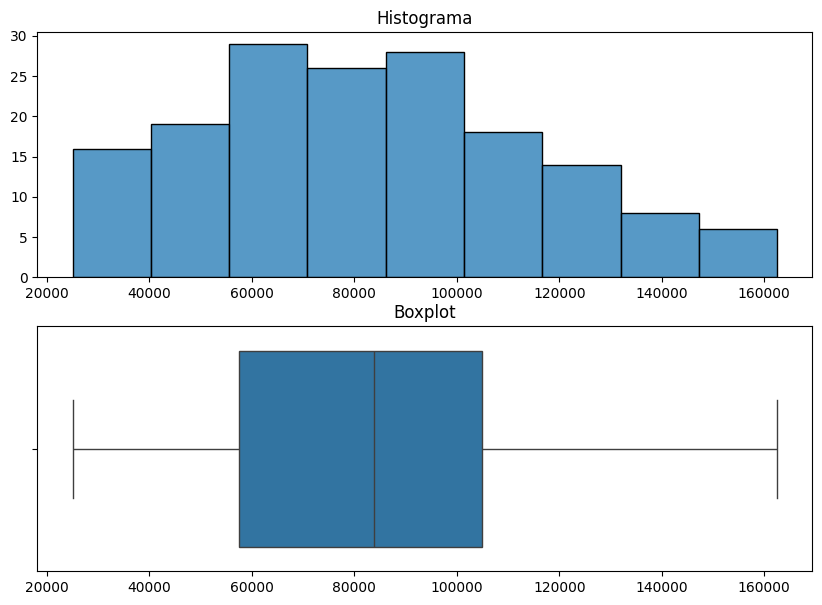

In [15]:
plot_hist_box(df, 'Income')

### Education

In [16]:
df_education = df['Education'].value_counts().sort_index().reset_index(name='Absolute')
df_education['Relative'] = df_education['Absolute'] / df_education['Absolute'].sum() * 100
df_education

,Education,Absolute,Relative
0,Associate's Degree,25,15.243902
1,Bachelor's Degree,42,25.609756
2,Doctorate,31,18.902439
3,High School Diploma,30,18.292683
4,Master's Degree,36,21.951220


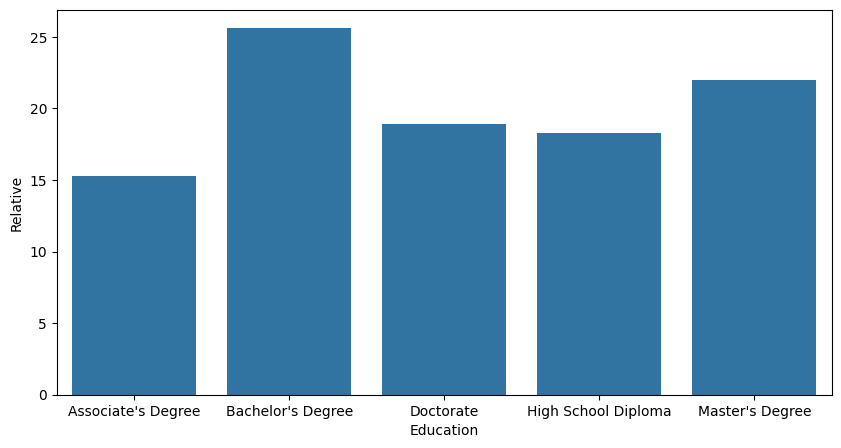

In [17]:
plot_categorical(df_education, 'Education', 'Relative')

### MaritalStatus

In [18]:
df_status = df['MaritalStatus'].value_counts().sort_index().reset_index(name='Absolute')
df_status['Relative'] = df_status['Absolute'] / df_status['Absolute'].sum() * 100
df_status

,MaritalStatus,Absolute,Relative
0,Married,87,53.04878
1,Single,77,46.95122


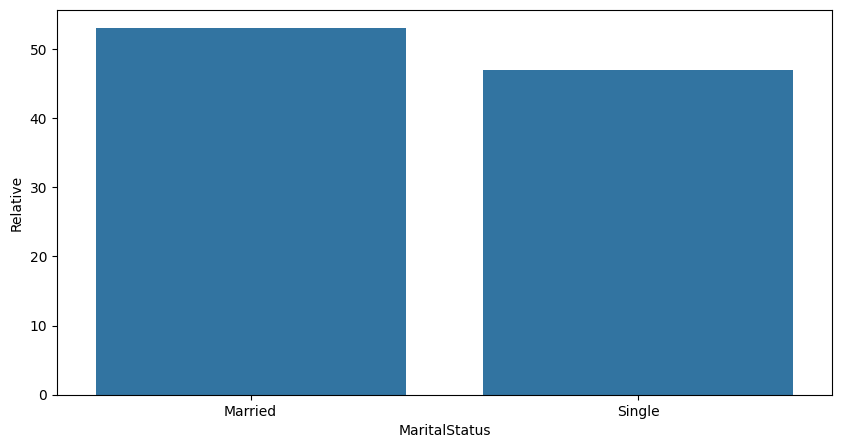

In [19]:
plot_categorical(df_status, 'MaritalStatus', 'Relative')

### NumberChildren

In [20]:
df_number = df['NumberChildren'].value_counts().sort_index().reset_index(name='Absolute')
df_number['Relative'] = df_number['Absolute'] / df_number['Absolute'].sum() * 100
df_number

,NumberChildren,Absolute,Relative
0,0,97,59.146341
1,1,32,19.512195
2,2,30,18.292683
3,3,5,3.048780


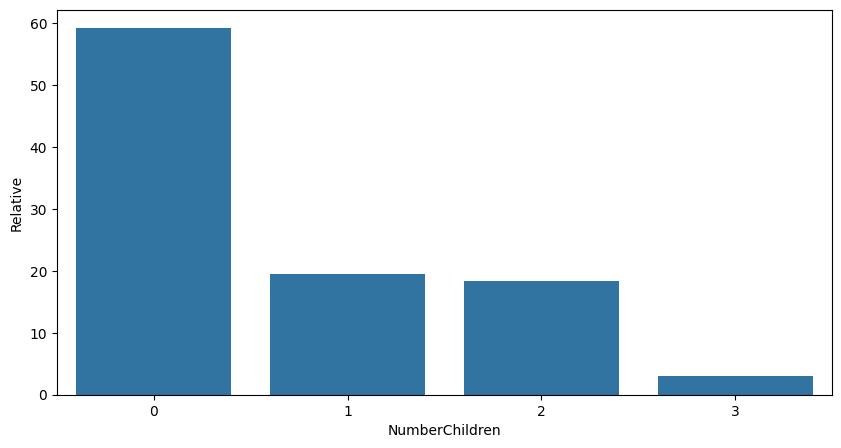

In [21]:
plot_categorical(df_number, 'NumberChildren', 'Relative')

### HomeOwnership

In [22]:
df_home = df['HomeOwnership'].value_counts().sort_index().reset_index(name='Absolute')
df_home['Relative'] = df_home['Absolute'] / df_home['Absolute'].sum() * 100
df_home

,HomeOwnership,Absolute,Relative
0,Owned,111,67.682927
1,Rented,53,32.317073


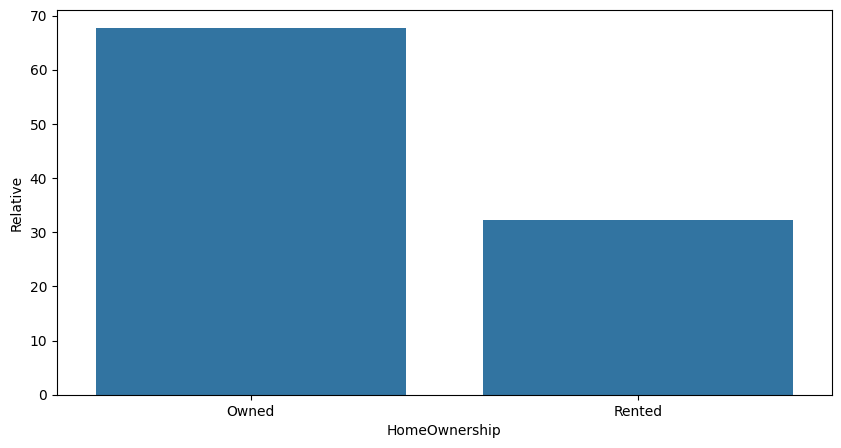

In [23]:
plot_categorical(df_home, 'HomeOwnership', 'Relative')

### CreditScore

In [24]:
df_score = df['CreditScore'].value_counts().sort_index().reset_index(name='Absolute')
df_score['Relative'] = df_score['Absolute'] / df_score['Absolute'].sum() * 100
df_score

,CreditScore,Absolute,Relative
0,Average,36,21.951220
1,High,113,68.902439
2,Low,15,9.146341


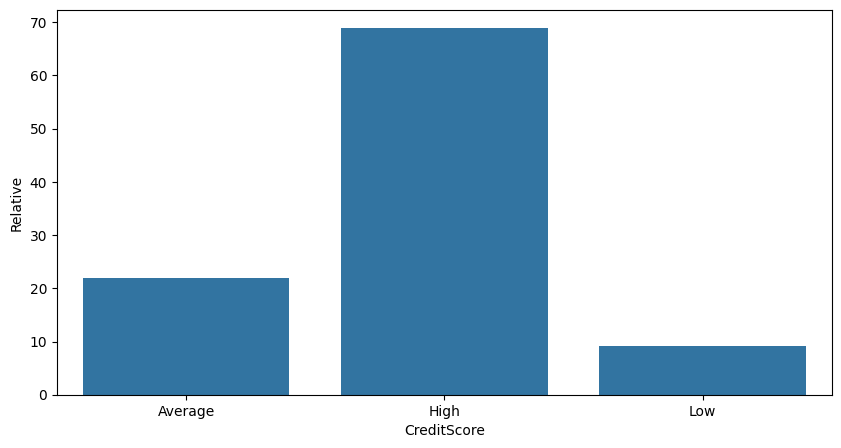

In [25]:
plot_categorical(df_score, 'CreditScore', 'Relative')

## Encoding

### Gender

In [26]:
# One-Hot Encoder
df = pd.get_dummies(df, columns=['Gender'])

df.sample(3)

,Age,Income,Education,MaritalStatus,NumberChildren,HomeOwnership,CreditScore,Gender_Female,Gender_Male
90,25,57500,Bachelor's Degree,Single,0,Rented,Average,True,False
40,51,140000,Bachelor's Degree,Married,0,Owned,High,False,True
4,45,100000,Bachelor's Degree,Married,3,Owned,High,True,False


In [27]:
df.rename(columns={'Gender_Female':'Female', 'Gender_Male':'Male'}, inplace=True)
df['Female'] = df['Female'].astype(int)
df['Male'] = df['Male'].astype(int)

df = df[['Age','Female','Male','Income','Education','MaritalStatus',
         'NumberChildren','HomeOwnership','CreditScore']]
df.sample(3)

,Age,Female,Male,Income,Education,MaritalStatus,NumberChildren,HomeOwnership,CreditScore
108,42,0,1,110000,Master's Degree,Single,0,Owned,High
90,25,1,0,57500,Bachelor's Degree,Single,0,Rented,Average
110,52,0,1,137500,High School Diploma,Married,0,Owned,High


### Education

In [28]:
# Label Encoder
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])

df.sample(3)

,Age,Female,Male,Income,Education,MaritalStatus,NumberChildren,HomeOwnership,CreditScore
43,37,1,0,72500,1,Married,2,Owned,High
104,51,0,1,150000,1,Married,0,Owned,High
24,29,1,0,25000,3,Single,0,Rented,Low


In [29]:
print(label_encoder.classes_)

["Associate's Degree" "Bachelor's Degree" 'Doctorate'
 'High School Diploma' "Master's Degree"]


In [30]:
print(label_encoder.inverse_transform([3]))

['High School Diploma']


### MaritalStatus

In [31]:
# One-Hot Encoder
df = pd.get_dummies(df, columns=['MaritalStatus'])

df.sample(3)

,Age,Female,Male,Income,Education,NumberChildren,HomeOwnership,CreditScore,MaritalStatus_Married,MaritalStatus_Single
119,39,1,0,62500,1,2,Owned,High,True,False
158,53,0,1,122500,0,0,Owned,High,True,False
99,26,1,0,50000,0,0,Rented,Average,False,True


In [32]:
df.rename(columns={'MaritalStatus_Married':'Married',
                   'MaritalStatus_Single':'Single'}, inplace=True)
df['Married'] = df['Married'].astype(int)
df['Single'] = df['Single'].astype(int)
df.drop(columns='Single', inplace=True)

df = df[['Age','Female','Male','Income','Education','Married',
         'NumberChildren','HomeOwnership','CreditScore']]
df.sample(3)

,Age,Female,Male,Income,Education,Married,NumberChildren,HomeOwnership,CreditScore
104,51,0,1,150000,1,1,0,Owned,High
84,53,0,1,125000,0,1,0,Owned,High
76,42,0,1,105000,4,0,0,Owned,High


### HomeOwnership

In [33]:
# One-Hot Encoder
df = pd.get_dummies(df, columns=['HomeOwnership'])

df.sample(3)

,Age,Female,Male,Income,Education,Married,NumberChildren,CreditScore,HomeOwnership_Owned,HomeOwnership_Rented
55,39,1,0,62500,1,1,2,High,True,False
139,45,1,0,105000,1,1,3,High,True,False
74,32,0,1,57500,0,0,0,Average,False,True


In [34]:
df.rename(columns={'HomeOwnership_Owned':'HomeOwner',
                   'HomeOwnership_Rented':'HomeRenter'}, inplace=True)
df['HomeOwner'] = df['HomeOwner'].astype(int)
df['HomeRenter'] = df['HomeRenter'].astype(int)
df.drop(columns='HomeRenter', inplace=True)

df = df[['Age','Female','Male','Income','Education','Married',
         'NumberChildren','HomeOwner','CreditScore']]
df.sample(3)

,Age,Female,Male,Income,Education,Married,NumberChildren,HomeOwner,CreditScore
29,25,1,0,55000,1,0,0,0,Average
83,48,1,0,85000,2,1,1,1,High
75,37,1,0,75000,1,1,2,1,High


### CreditScore

In [35]:
# Ordinal Encoder
categories = ['Low', 'Average', 'High']

ordinal_encoder = OrdinalEncoder(categories=[categories])
df['CreditScore'] = ordinal_encoder.fit_transform(df[['CreditScore']])
df['CreditScore'] = df['CreditScore'].astype('int')

df.sample(3)

,Age,Female,Male,Income,Education,Married,NumberChildren,HomeOwner,CreditScore
100,31,0,1,70000,1,0,0,0,1
117,29,1,0,27500,3,0,0,0,0
140,50,0,1,155000,4,1,0,1,2


In [36]:
print(ordinal_encoder.categories_)

[array(['Low', 'Average', 'High'], dtype=object)]


In [37]:
print(ordinal_encoder.inverse_transform([[2]]))

[['High']]


## Correlation

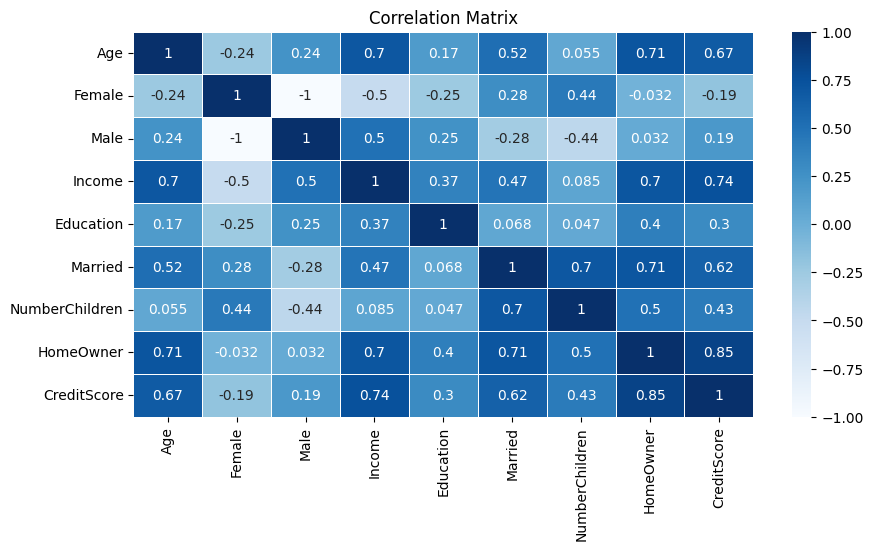

In [38]:
corr_mat = df.corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_mat, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Spliting

In [39]:
X = df.drop('CreditScore', axis=1)
y = df['CreditScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [40]:
print(f'X_train: {X_train.shape}')
print(f'X_test:  {X_test.shape}')

print(f'y_train: {y_train.shape}')
print(f'y_test:  {y_test.shape}')

X_train: (123, 8)
X_test:  (41, 8)
y_train: (123,)
y_test:  (41,)


In [41]:
X_train.sample(3)

,Age,Female,Male,Income,Education,Married,NumberChildren,HomeOwner
8,36,1,0,80000,4,1,2,1
104,51,0,1,150000,1,1,0,1
66,50,0,1,160000,4,1,0,1


In [42]:
df_split = y_train.value_counts().sort_index().reset_index(name='Absolute')
df_split['Relative'] = df_split['Absolute'] / df_split['Absolute'].sum() * 100
df_split

,CreditScore,Absolute,Relative
0,0,11,8.943089
1,1,25,20.325203
2,2,87,70.731707


## K-Nearest Neighbors

### Model Training

In [43]:
knn_model = KNeighborsClassifier(n_neighbors=10, # 20
                                 weights='distance', # uniform
                                 metric='manhattan') # euclidean
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

In [44]:
acc_test = knn_model.score(X_test, y_test)

print('Accuracy:', round(acc_test, 2))

Accuracy: 0.9


### Model Prediction

In [45]:
row_num = 3

print(f'Features:\n{X_test.iloc[row_num]}\n')
print(f'Target: {y_test.iloc[row_num]}')

row_test = pd.DataFrame([X_test.iloc[row_num]])
y_pred = knn_model.predict(row_test)

print(f'Prediction: {y_pred[0]}')

Features:
Age                  25
Female                1
Male                  0
Income            57500
Education             1
Married               0
NumberChildren        0
HomeOwner             0
Name: 58, dtype: int64

Target: 1
Prediction: 1


In [46]:
row_test = pd.DataFrame([[33,     # Age
                          0,      # Female
                          1,      # Male
                          70000,  # Income
                          2,      # Education
                          0,      # Married
                          0,      # NumberChildren
                          1]],    # HomeOwner
                        columns=X_test.columns)
y_pred = knn_model.predict(row_test)

print(f'Prediction: {y_pred[0]}')

Prediction: 1


## Dim Reduction

### PCA

In [47]:
pca = PCA()
pca_fit = pca.fit(X)

df_pca = pca_fit.transform(X_train)
df_pca = pd.DataFrame(df_pca)
df_pca.sample(3)

,0,1,2,3,4,5,6,7
82,6234.757640,7.910307,-0.058599,0.628338,-0.368993,-0.026620,-0.052001,-1.146989e-12
101,21234.757009,3.208304,1.292670,2.316994,0.414281,0.534324,-0.512678,9.217329e-13
51,-15765.245273,-6.060822,-0.034931,1.758400,0.107899,-0.075898,0.297706,1.025167e-12



### Explained Variance

In [48]:
print(pca.explained_variance_ratio_)

[9.99999962e-01 3.49193242e-08 1.56769085e-09 1.05168144e-09
 1.93220730e-10 4.70172644e-11 3.35489202e-11 7.86627519e-35]


In [49]:
print(pca.explained_variance_ratio_.cumsum())

[0.99999996 1.         1.         1.         1.         1.
 1.         1.        ]


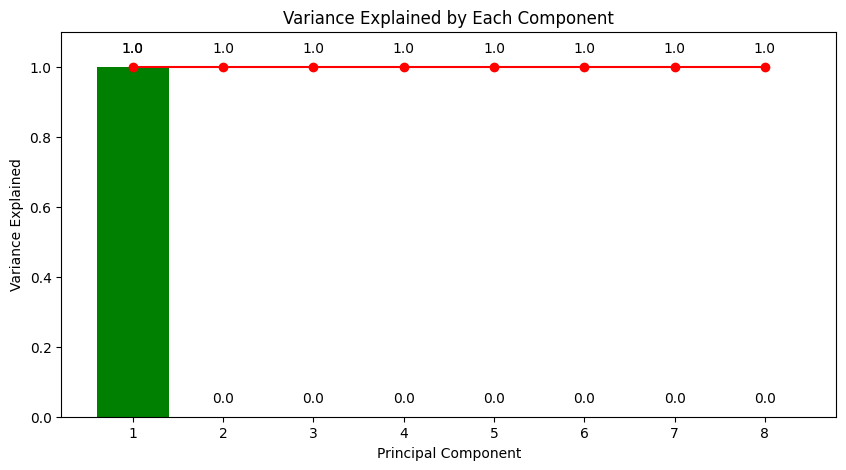

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Variance Explained by Each Component')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')

ax.bar(np.arange(pca.n_components_) + 1,
       pca.explained_variance_ratio_,
       color='green')

for x, y in zip(np.arange(len(df_pca.columns)) + 1, pca.explained_variance_ratio_):
    ax.annotate(round(y,2), (x,y), textcoords='offset points', xytext=(0,10), ha='center')

ax.plot(np.arange(len(df_pca.columns)) + 1,
        pca.explained_variance_ratio_.cumsum(),
        color='red', marker='o')

for x, y in zip(np.arange(len(df_pca.columns)) + 1, pca.explained_variance_ratio_.cumsum()):
    ax.annotate(round(y,2), (x,y), textcoords='offset points', xytext=(0,10), ha='center')

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
plt.show()

### Transform

In [51]:
pca_train = df_pca[[0,1]]
pca_train.sample(3)

,0,1
48,-31265.244271,0.657768
115,28734.754202,-13.255908
26,-21265.245949,-9.069776


In [52]:
pca_test = pca_fit.transform(X_test)

pca_test = pd.DataFrame(pca_test)
pca_test = pca_test[[0,1]]
pca_test.sample(3)

,0,1
19,-3765.244383,-2.253880
38,-26265.244586,-1.163383
16,21234.754329,-11.889310


### Prediction

In [53]:
knn_pca = KNeighborsClassifier(n_neighbors=10,
                                 weights='distance',
                                 metric='manhattan')
knn_pca.fit(pca_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

In [54]:
acc_test = knn_pca.score(pca_test, y_test)

print('Accuracy:', round(acc_test, 2))

Accuracy: 0.9


### Visualization

In [55]:
data_pca = pd.concat([pca_train, y_train], axis=1)
data_pca.sample(3)

,0,1,CreditScore
159,NaN,NaN,0.0
52,31234.758293,9.381380,2.0
121,-28765.245619,-6.658701,NaN


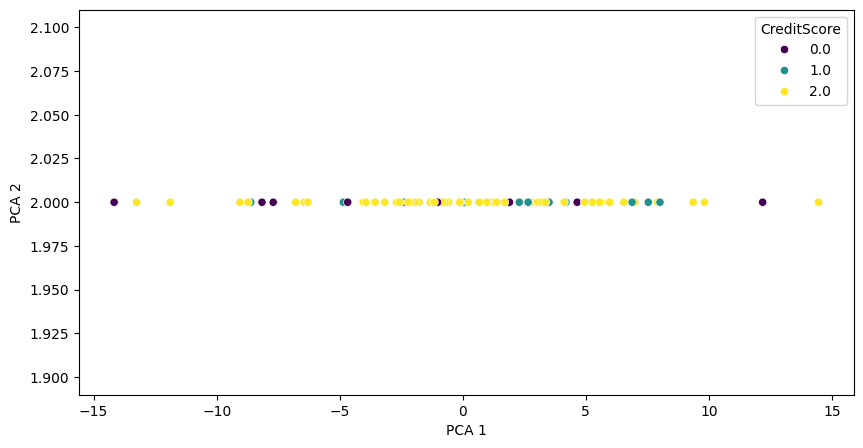

In [56]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data_pca, x=1, y=2, hue='CreditScore', palette='viridis')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Metrics

### Cross-Validation

In [57]:
results = cross_val_score(knn_model, X_test, y_test, cv=20)

print("Results:", results)
print("Accuracy (mean +/- desv): %0.4f +/- %0.4f" % (results.mean(), results.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=20.
  warnings.warn(


Results: [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.5 1.  1.  1.  0.5 1.  1.  0.5
 1.  1. ]
Accuracy (mean +/- desv): 0.9250 +/- 0.1785


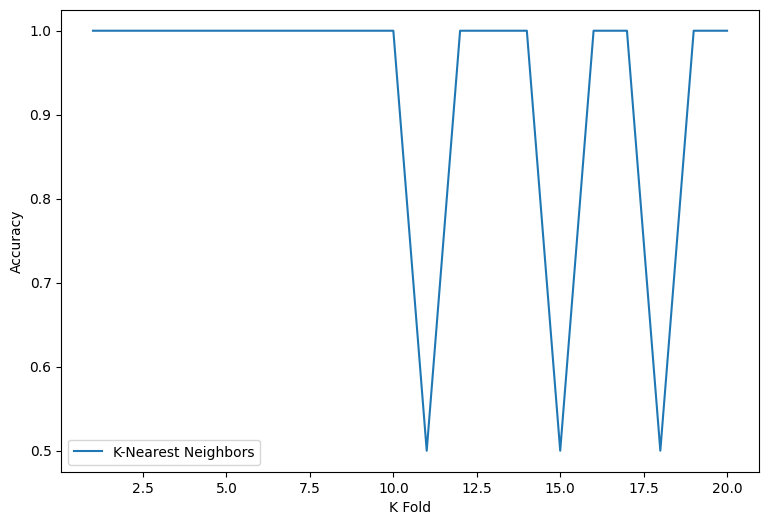

In [58]:
plt.figure(figsize=(9, 6))
plt.plot(range(1, 21), results, label='K-Nearest Neighbors')

plt.xlabel('K Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Classification Report

In [59]:
y_pred = knn_model.predict(X_test)

In [60]:
print('Exactitud:    %.2f' % (accuracy_score(y_test, y_pred)))
print('Precisión:    %.2f' % (precision_score(y_test, y_pred, average='macro')))
print('Sensibilidad: %.2f' % (recall_score(y_test, y_pred, average='macro')))
print('F1-score:     %.2f' % (f1_score(y_test, y_pred, average='macro')))

Exactitud:    0.90
Precisión:    0.91
Sensibilidad: 0.91
F1-score:     0.91


In [61]:
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.82      0.82      0.82        11
           2       0.92      0.92      0.92        26

    accuracy                           0.90        41
   macro avg       0.91      0.91      0.91        41
weighted avg       0.90      0.90      0.90        41



### Confusion Matrix

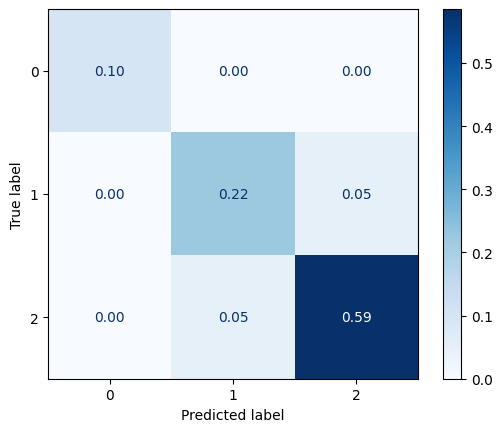

In [62]:
cm_knn = confusion_matrix(y_test, y_pred, normalize='all')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=knn_model.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.show()